### NAME- Suvajyoti Chakraborty
### ID - A21034
### BATCH- Kolkata Data Science Batch 2021 

# SPARK INSTALLATION

!apt is a linux programme used to install new software in a machine. First updated the !apt then installed the openjdk-8-jdk-headless .

In [1]:
!apt update > /dev/null
!apt install openjdk-8-jdk-headless -qq > /dev/null

Using !wget command first installed the Spark. It will installed as tgz file format which is a linux zip file format. !tar is the unzip programme of linux. Then install pyspark which allows to access spark with the help of python.

In [2]:
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q pyspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 198 kB 54.8 MB/s 


In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").config('spark.ui.port', '4050').getOrCreate()

In [4]:
sc = spark.sparkContext

In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

#DATA LOADING

Loading the data using !wget command from my github repository where the dataset is uploaded.

In [6]:
!wget -q https://raw.githubusercontent.com/Suvajyoti/Loan_eligibility_prediction_with_pyspark/main/loan_eligibility_data.csv

In [7]:
ls

drive/                     spark-3.1.2-bin-hadoop3.2/
loan_eligibility_data.csv  spark-3.1.2-bin-hadoop3.2.tgz
sample_data/


Reading the CSV file with spark read csv command and stored it into a variable called df.

In [8]:
df=spark.read.csv('/content/loan_eligibility_data.csv',inferSchema=True,header=True)

Counting the number of rows and columns.There are total 614 rows and 13 columns. 

In [9]:
print((df.count(),len(df.columns)))

(614, 13)


Showing the first 5  rows of the loaded data in a spark dataframe. 

In [10]:
df.show(5)

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      null|             360|             1|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|          Y

Showing the structure of the dataframe also called schema.This command also shows the data types of each of the column.  

In [11]:
df.printSchema()

root
 |-- Loan_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = true)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: double (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Loan_Status: string (nullable = true)



Describe function gives the five point statistical summary of columns the loaded datset such as count ,mean , standard deviation, minimun range and the maximum range.

In [12]:
df.describe().show()

+-------+--------+------+-------+------------------+------------+-------------+-----------------+------------------+------------------+-----------------+------------------+-------------+-----------+
|summary| Loan_ID|Gender|Married|        Dependents|   Education|Self_Employed|  ApplicantIncome| CoapplicantIncome|        LoanAmount| Loan_Amount_Term|    Credit_History|Property_Area|Loan_Status|
+-------+--------+------+-------+------------------+------------+-------------+-----------------+------------------+------------------+-----------------+------------------+-------------+-----------+
|  count|     614|   601|    611|               599|         614|          582|              614|               614|               592|              600|               564|          614|        614|
|   mean|    null|  null|   null|0.5547445255474452|        null|         null|5403.459283387622| 1621.245798027101|146.41216216216216|            342.0|0.8421985815602837|         null|       null|
| std

Loan Id column is not of use as per my own understanding so dropped the column using drop function. * signifies the same in the sql , select all the element of that particularly mentioned column here it is Loan_ID.

In [13]:
df = df.drop(*['Loan_ID'])
df.show(5)

+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      null|             360|             1|        Urban|          Y|
|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|          Y|
|  Male|    Yes|         0|Not Graduate|           N

#Null Value Imputation

Checking the null values or missing values for each of the column and count the number of null values.

Reference Link :https://sparkbyexamples.com/pyspark/pyspark-count-of-non-null-nan-values-in-dataframe/ 

In [14]:
from pyspark.sql.functions import col,sum
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|    13|      3|        15|        0|           32|              0|                0|        22|              14|            50|            0|          0|
+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+



There are 22 null/missing values in the Loan Amount column. So, Calculating the average of the Loan Amount column which is 146.41 and replaced it with the null values exists in that column.Again calculated the new average of the column which is 146.39.

In [15]:
from pyspark.sql.functions import mean
mean_val = df.select(mean(df.LoanAmount)).collect()
print('Average value', mean_val[0][0])

Average value 146.41216216216216


In [16]:
mean_loan_amount = mean_val[0][0]
df = df.na.fill(mean_loan_amount, subset=['LoanAmount'])
mean_val = df.select(mean(df.LoanAmount)).collect()
print('New Average value', mean_val[0][0])

New Average value 146.3973941368078


There are 14 null/missing values in Loan amount term column. It is not a continuous variable .As per my understanding it is actually in days so mean cannot be used. So using median for missing value substitution.

In [17]:
median_loan_term = df.approxQuantile("Loan_Amount_Term", [0.5], 0.25)
median_loan_term = int(median_loan_term[0])
print('Median value', median_loan_term)

Median value 360


In [18]:
df = df.na.fill(median_loan_term, subset=['Loan_Amount_Term'])

There are 13 null/missing values in Gender column. It is a categorical variable .As per my understanding there is no other gender category except male and female.Male count is much greater than the female count. So using mode for substitution of missing value by male.

In [19]:
df.groupBy("Gender").count().show()

+------+-----+
|Gender|count|
+------+-----+
|  null|   13|
|Female|  112|
|  Male|  489|
+------+-----+



In [20]:
df = df.na.fill('Male',subset=['Gender'])
df.groupBy("Gender").count().show()

+------+-----+
|Gender|count|
+------+-----+
|Female|  112|
|  Male|  502|
+------+-----+



There are 3 null/missing values in Married column. It is a categorical variable .As per my understanding there is no other category except yes and no. Yes count is much greater than the no count. So using mode for substitution of missing value by yes.

In [21]:
df.groupBy("Married").count().show()
df = df.na.fill('Yes',subset=['Married'])
df.groupBy("Married").count().show()

+-------+-----+
|Married|count|
+-------+-----+
|   null|    3|
|     No|  213|
|    Yes|  398|
+-------+-----+

+-------+-----+
|Married|count|
+-------+-----+
|     No|  213|
|    Yes|  401|
+-------+-----+



There are 15 null/missing values in Dependents column. It is a categorical variable .As per my understanding there is no other dependents category except 0,1,2 and 3+.Count of 0 is much greater than the others count. So using mode for substitution of missing value by count 0.

In [22]:
df.groupBy("Dependents").count().show()
df = df.na.fill('0',subset=['Dependents'])
df.groupBy("Dependents").count().show()

+----------+-----+
|Dependents|count|
+----------+-----+
|         0|  345|
|      null|   15|
|         1|  102|
|        3+|   51|
|         2|  101|
+----------+-----+

+----------+-----+
|Dependents|count|
+----------+-----+
|         0|  360|
|         1|  102|
|        3+|   51|
|         2|  101|
+----------+-----+



There are 32 null/missing values in Self employed column. It is a categorical variable .As per my understanding there is no other category except yes and no.Male count of No is much greater than the yes count. So using mode for substitution of missing value by No.

In [23]:
df.groupBy("Self_Employed").count().show()
df = df.na.fill('No',subset=['Self_Employed'])
df.groupBy("Self_Employed").count().show()

+-------------+-----+
|Self_Employed|count|
+-------------+-----+
|         null|   32|
|           No|  500|
|          Yes|   82|
+-------------+-----+

+-------------+-----+
|Self_Employed|count|
+-------------+-----+
|           No|  532|
|          Yes|   82|
+-------------+-----+



There are 50 null/missing values in Gender column. It is a categorical variable .As per my understanding there is no other category except yes for 1 and no for 0.Credit history 'yes' also denoted as 1 is greater than credit hisstory 'no' also denoted as 0. So using mode for substitution of missing value by Credit history 'yes'.

In [24]:
df.groupBy("Credit_History").count().show()
df = df.na.fill(1,subset=['Credit_History'])
df.groupBy("Credit_History").count().show()

+--------------+-----+
|Credit_History|count|
+--------------+-----+
|          null|   50|
|             1|  475|
|             0|   89|
+--------------+-----+

+--------------+-----+
|Credit_History|count|
+--------------+-----+
|             1|  525|
|             0|   89|
+--------------+-----+



#EDA

Installed the required libraries for visualisation.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Distribution of Loan Amount

Text(0.5, 1.0, 'Distribution of Loan Amount')

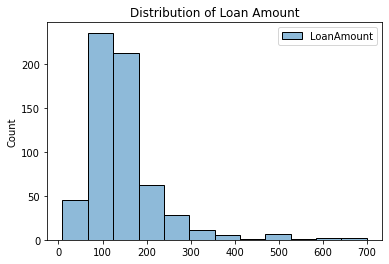

In [26]:
df_plot = df.select(['LoanAmount']).toPandas()
sns.histplot(df_plot,bins=12)
plt.title('Distribution of Loan Amount')

Distribution of Applicant Income.Right Skewed Distribution Observed.

Text(0.5, 1.0, 'Distribution of Applicant Income')

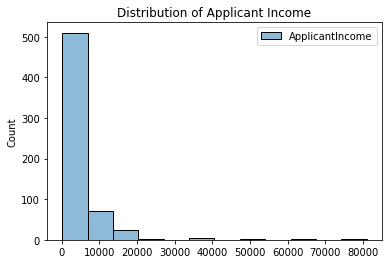

In [27]:
df_plot = df.select(['ApplicantIncome']).toPandas()
sns.histplot(df_plot,bins=12)
plt.title('Distribution of Applicant Income')

Presence of Outliers in Applicant Income.

Text(0.5, 1.0, 'Distribution of Applicant Income')

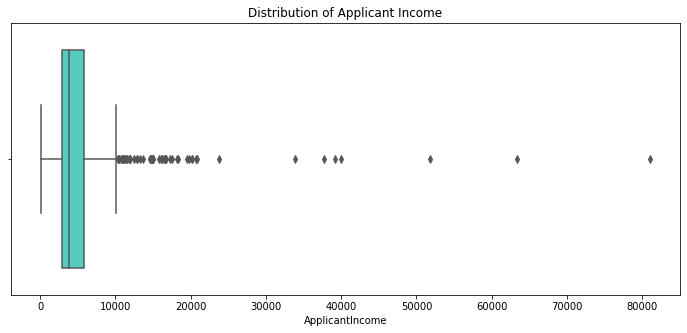

In [28]:
df_plot = df.select(['ApplicantIncome']).toPandas()
plt.figure(figsize=(12,5))
sns.boxplot(df_plot['ApplicantIncome'],color='turquoise')
plt.title('Distribution of Applicant Income')

Presence of Outliers in Loan Amount.High amount of loan is given to some sectors.

Text(0.5, 1.0, 'Distribution of Loan Amount')

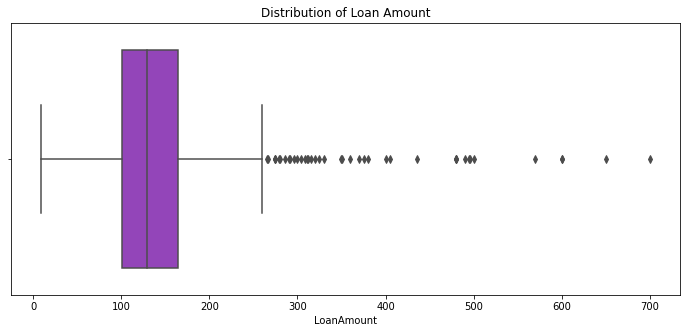

In [29]:
df_plot = df.select(['LoanAmount']).toPandas()
plt.figure(figsize=(12,5))
sns.boxplot(df_plot['LoanAmount'],color='darkorchid')
plt.title('Distribution of Loan Amount')

Loan Status Bar Plot.

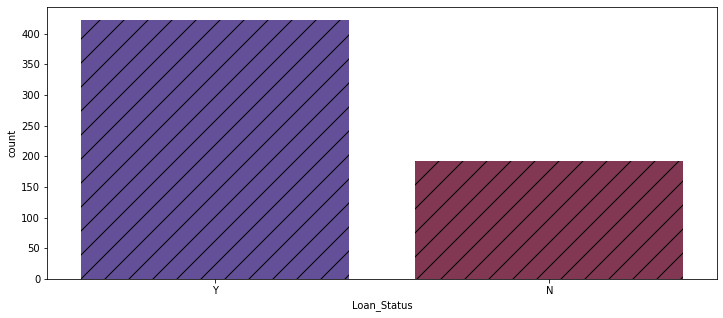

In [30]:
df.groupBy("Loan_Status").count()
df_plot = df.select(['Loan_Status']).toPandas()
plt.figure(figsize=(12,5))
sns.countplot(df_plot['Loan_Status'],palette='twilight',hatch='/')

Median Loan Amount provided to Rural Area is slightly higher than Urban. But there are some people in Urban who has got higher loan amounts compared to Rural or Semi urban.

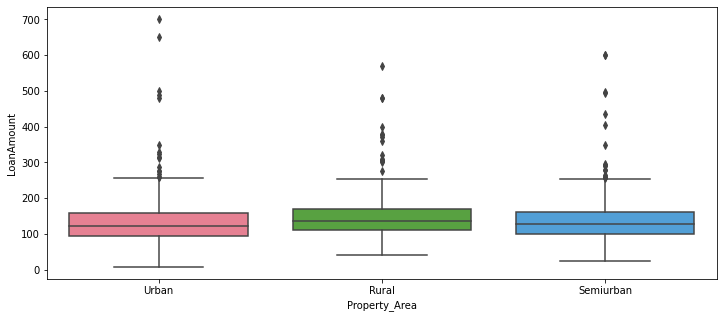

In [31]:
df_plot = df.select(['Property_Area','LoanAmount']).toPandas()
plt.figure(figsize=(12,5))
sns.boxplot(df_plot['Property_Area'],df_plot['LoanAmount'],palette='husl')

Some of the graduates are generally have more income than the not graduates.There is no huge difference between their mean income.  

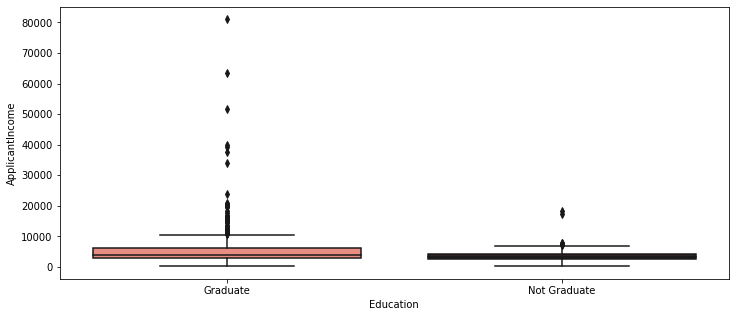

In [32]:
df_plot = df.select(['Education','ApplicantIncome']).toPandas()
plt.figure(figsize=(12,5))
sns.boxplot(df_plot['Education'],df_plot['ApplicantIncome'],palette='dark:salmon_r')

Loan Applicants are more in Male than the female but the chances of getting loan to the each category is almost equal.  

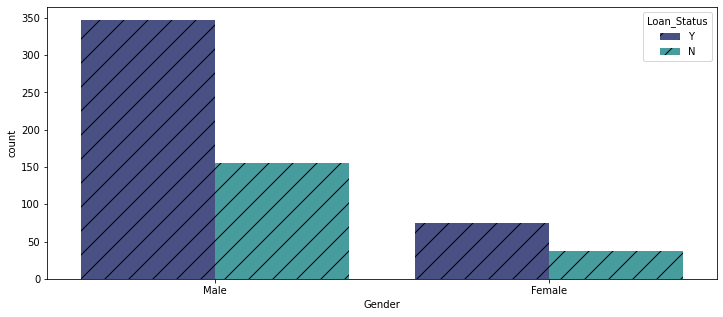

In [33]:
df.groupBy("Gender").pivot("Loan_Status").count()
df_plot = df.select(['Gender','Loan_Status']).toPandas()
plt.figure(figsize=(12,5))
sns.countplot(x=df_plot['Gender'],hue=df_plot['Loan_Status'],palette='mako',hatch='/')

Dependent 2 received more chance of getting loan.

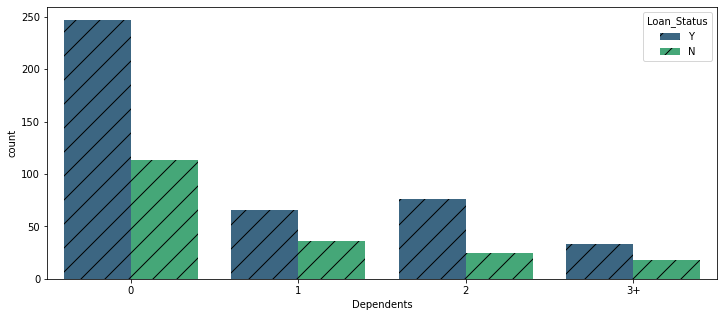

In [34]:
df.groupBy("Dependents").pivot("Loan_Status").count()
df_plot = df.select(['Dependents','Loan_Status']).toPandas()
plt.figure(figsize=(12,5))
sns.countplot(x=df_plot['Dependents'],hue=df_plot['Loan_Status'],palette='viridis',hatch='/')

Graduates have more chance of getting loan approved.

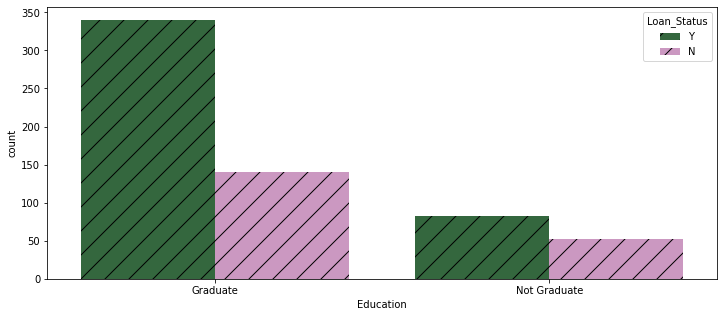

In [35]:
df.groupBy("Education").pivot("Loan_Status").count()
df_plot = df.select(['Education','Loan_Status']).toPandas()
plt.figure(figsize=(12,5))
sns.countplot(x=df_plot['Education'],hue=df_plot['Loan_Status'],palette='cubehelix',hatch='/')

Semi urban areas have much higher chance of getting loan than the other areas.

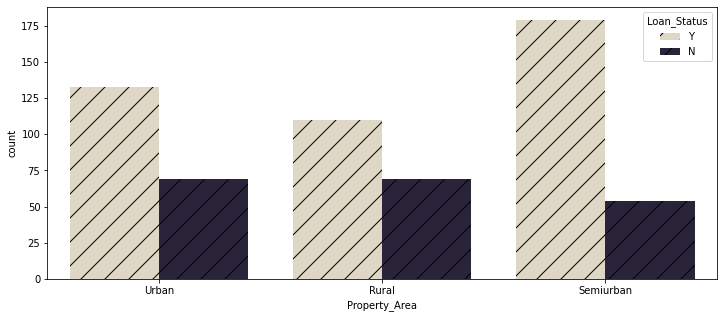

In [36]:
df.groupBy("Property_Area").pivot("Loan_Status").count()
df_plot = df.select(['Property_Area','Loan_Status']).toPandas()
plt.figure(figsize=(12,5))
sns.countplot(x=df_plot['Property_Area'],hue=df_plot['Loan_Status'],palette='ch:s=-.2,r=.6',hatch='/')

#Feature Engineering

Creating a Total Income column to sum the amount  of income of Applicant Income and co applicant income.

Reference 1 : https://stackoverflow.com/questions/31955309/add-column-sum-as-new-column-in-pyspark-dataframe

Reference 2 : https://www.geeksforgeeks.org/pyspark-dataframe-add-column-based-on-other-columns/

In [37]:
from pyspark.sql.functions import col
df = df.withColumn("TotalIncome", col("ApplicantIncome")+col("CoapplicantIncome"))
df.show(5)

+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|
+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+
|  Male|     No|         0|    Graduate|           No|           5849|              0.0|       146|             360|             1|        Urban|          Y|     5849.0|
|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|     6091.0|
|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|     

Creating EMI column by dividing the loan amount by the loan amount term.

In [38]:
df = df.withColumn("EMI", col("LoanAmount")/col("Loan_Amount_Term"))
df.show(5)

+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+-------------------+
|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|                EMI|
+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+-------------------+
|  Male|     No|         0|    Graduate|           No|           5849|              0.0|       146|             360|             1|        Urban|          Y|     5849.0|0.40555555555555556|
|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|     6091.0|0.35555555555555557|
|  Male|    Yes|         0|    Graduate|          

#Data Preprocessing

A label indexer that maps a string column of labels to an ML column of label indices. If the input column is numeric, we cast it to string and index the string values. The indices are in [0, numLabels). By default, this is ordered by label frequencies so the most frequent label gets index 0. The ordering behavior is controlled by setting stringOrderType. Its default value is ‘frequencyDesc’.

Reference : https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.StringIndexer.html

In [39]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
SI_gender = StringIndexer(inputCol='Gender',outputCol='gender_Index')
SI_married = StringIndexer(inputCol='Married',outputCol='married_Index')
SI_dependents = StringIndexer(inputCol='Dependents',outputCol='dependents_Index')
SI_education = StringIndexer(inputCol='Education',outputCol='education_Index')
SI_selfemp = StringIndexer(inputCol='Self_Employed',outputCol='selfemp_Index')
SI_credit = StringIndexer(inputCol='Credit_History',outputCol='credit_Index')
SI_property = StringIndexer(inputCol='Property_Area',outputCol='property_Index')
SI_loanstatus = StringIndexer(inputCol='Loan_Status',outputCol='loanstatus_Index')

df = SI_gender.fit(df).transform(df)
df = SI_married.fit(df).transform(df)
df = SI_dependents.fit(df).transform(df)
df = SI_education.fit(df).transform(df)
df = SI_selfemp.fit(df).transform(df)
df = SI_credit.fit(df).transform(df)
df = SI_property.fit(df).transform(df)
df = SI_loanstatus.fit(df).transform(df)

Checking the transformed data.

In [40]:
df.select('Gender', 'gender_Index', 'Married', 'married_Index','Dependents','dependents_Index','Education','education_Index','Self_Employed','selfemp_Index','Credit_History','credit_Index','Property_Area','property_Index','Loan_Status','loanstatus_Index').show(5)

+------+------------+-------+-------------+----------+----------------+------------+---------------+-------------+-------------+--------------+------------+-------------+--------------+-----------+----------------+
|Gender|gender_Index|Married|married_Index|Dependents|dependents_Index|   Education|education_Index|Self_Employed|selfemp_Index|Credit_History|credit_Index|Property_Area|property_Index|Loan_Status|loanstatus_Index|
+------+------------+-------+-------------+----------+----------------+------------+---------------+-------------+-------------+--------------+------------+-------------+--------------+-----------+----------------+
|  Male|         0.0|     No|          1.0|         0|             0.0|    Graduate|            0.0|           No|          0.0|             1|         0.0|        Urban|           1.0|          Y|             0.0|
|  Male|         0.0|    Yes|          0.0|         1|             1.0|    Graduate|            0.0|           No|          0.0|            

At First create object and specify input and output column.Then fit and Transform the data.Then checked the output.One Hot Encoding is used for converting categorical attributes into a numeric vector that machine learning models can understand.


Reference : https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.ml.feature.OneHotEncoder.html#:~:text=A%20one%2Dhot%20encoder%20that,0.0%2C%201.0%2C%200.0%5D%20.

In [41]:
OHE = OneHotEncoder(inputCols=['gender_Index', 'married_Index','dependents_Index','education_Index',
                               'selfemp_Index','credit_Index','property_Index','loanstatus_Index'],
                    outputCols=['gender_OHE', 'married_OHE','dependents_OHE','education_OHE',
                                'selfemp_OHE','credit_OHE','property_OHE','loanstatus_OHE'])
df = OHE.fit(df).transform(df)
df.select('gender_Index', 'gender_OHE', 'education_Index','education_OHE','credit_Index',
          'credit_OHE','property_Index','property_OHE').show(10)

+------------+-------------+---------------+-------------+------------+-------------+--------------+-------------+
|gender_Index|   gender_OHE|education_Index|education_OHE|credit_Index|   credit_OHE|property_Index| property_OHE|
+------------+-------------+---------------+-------------+------------+-------------+--------------+-------------+
|         0.0|(1,[0],[1.0])|            0.0|(1,[0],[1.0])|         0.0|(1,[0],[1.0])|           1.0|(2,[1],[1.0])|
|         0.0|(1,[0],[1.0])|            0.0|(1,[0],[1.0])|         0.0|(1,[0],[1.0])|           2.0|    (2,[],[])|
|         0.0|(1,[0],[1.0])|            0.0|(1,[0],[1.0])|         0.0|(1,[0],[1.0])|           1.0|(2,[1],[1.0])|
|         0.0|(1,[0],[1.0])|            1.0|    (1,[],[])|         0.0|(1,[0],[1.0])|           1.0|(2,[1],[1.0])|
|         0.0|(1,[0],[1.0])|            0.0|(1,[0],[1.0])|         0.0|(1,[0],[1.0])|           1.0|(2,[1],[1.0])|
|         0.0|(1,[0],[1.0])|            0.0|(1,[0],[1.0])|         0.0|(1,[0],[1

In [42]:
df.select('Married','married_Index', 'married_OHE',
          'Property_Area','property_Index','property_OHE').show(10)

+-------+-------------+-------------+-------------+--------------+-------------+
|Married|married_Index|  married_OHE|Property_Area|property_Index| property_OHE|
+-------+-------------+-------------+-------------+--------------+-------------+
|     No|          1.0|    (1,[],[])|        Urban|           1.0|(2,[1],[1.0])|
|    Yes|          0.0|(1,[0],[1.0])|        Rural|           2.0|    (2,[],[])|
|    Yes|          0.0|(1,[0],[1.0])|        Urban|           1.0|(2,[1],[1.0])|
|    Yes|          0.0|(1,[0],[1.0])|        Urban|           1.0|(2,[1],[1.0])|
|     No|          1.0|    (1,[],[])|        Urban|           1.0|(2,[1],[1.0])|
|    Yes|          0.0|(1,[0],[1.0])|        Urban|           1.0|(2,[1],[1.0])|
|    Yes|          0.0|(1,[0],[1.0])|        Urban|           1.0|(2,[1],[1.0])|
|    Yes|          0.0|(1,[0],[1.0])|    Semiurban|           0.0|(2,[0],[1.0])|
|    Yes|          0.0|(1,[0],[1.0])|        Urban|           1.0|(2,[1],[1.0])|
|    Yes|          0.0|(1,[0

Showing All the Columns.

In [43]:
df.show(5)

+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+-----------+-------------------+------------+-------------+----------------+---------------+-------------+------------+--------------+----------------+--------------+-------------+-------------+--------------+-------------+-------------+-------------+-------------+
|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|TotalIncome|                EMI|gender_Index|married_Index|dependents_Index|education_Index|selfemp_Index|credit_Index|property_Index|loanstatus_Index|loanstatus_OHE|  married_OHE|  selfemp_OHE|dependents_OHE| property_OHE|   gender_OHE|   credit_OHE|education_OHE|
+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+---------

Checking for Correlation.

In [44]:
df_corr = df.toPandas()
corr = df_corr.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,gender_Index,married_Index,dependents_Index,education_Index,selfemp_Index,credit_Index,property_Index,loanstatus_Index
ApplicantIncome,1.000000,-0.116605,0.565621,-0.046531,-0.018615,0.893037,0.320525,-0.058809,-0.051708,0.118202,-0.140760,0.127180,0.018615,0.017321,0.004710
CoapplicantIncome,-0.116605,1.000000,0.187863,-0.059383,0.011134,0.342781,0.135695,-0.082912,-0.075948,0.030430,-0.062290,-0.016100,-0.011134,0.019087,0.059187
LoanAmount,0.565621,0.187863,1.000000,0.036486,-0.001412,0.620118,0.491286,-0.107909,-0.147131,0.163108,-0.167041,0.115259,0.001412,0.028995,0.036345
Loan_Amount_Term,-0.046531,-0.059383,0.036486,1.000000,-0.004705,-0.070917,-0.501359,0.074030,0.100912,-0.103864,-0.073928,-0.033739,0.004705,-0.016086,0.022549
Credit_History,-0.018615,0.011134,-0.001412,-0.004705,1.000000,-0.012563,0.015005,-0.009170,-0.010938,-0.040160,-0.073658,-0.001550,-1.000000,-0.033102,-0.540556
TotalIncome,0.893037,0.342781,0.620118,-0.070917,-0.012563,1.000000,0.364654,-0.093191,-0.083319,0.125590,-0.161362,0.113000,0.012563,0.025032,0.031271
EMI,0.320525,0.135695,0.491286,-0.501359,0.015005,0.364654,1.000000,-0.060169,-0.094347,0.103414,-0.075777,0.051647,-0.015005,0.005380,0.013595
gender_Index,-0.058809,-0.082912,-0.107909,0.074030,-0.009170,-0.093191,-0.060169,1.000000,0.364569,-0.172914,-0.045364,0.000525,0.009170,-0.109521,0.017987
married_Index,-0.051708,-0.075948,-0.147131,0.100912,-0.010938,-0.083319,-0.094347,0.364569,1.000000,-0.334216,-0.012304,-0.004489,0.010938,0.007281,0.091478
dependents_Index,0.118202,0.030430,0.163108,-0.103864,-0.040160,0.125590,0.103414,-0.172914,-0.334216,1.000000,0.055752,0.056798,0.040160,-0.001601,-0.010118


Using Vector assembler to merge multiple column into a vector column and taken output as a single feature column.Inputs are given for all the neccesary columns.

Reference : https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.ml.feature.VectorAssembler.html

In [45]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['gender_Index','married_Index','dependents_Index',
                                       'education_Index','selfemp_Index','ApplicantIncome',
                                       'CoapplicantIncome','EMI','LoanAmount','Loan_Amount_Term',
                                       'credit_Index','property_Index','gender_OHE',
                                       'married_OHE','dependents_OHE','education_OHE',
                                       'selfemp_OHE','credit_OHE','property_OHE'],
                           outputCol='features')
df2 = assembler.transform(df)

Showing the tranformed vector as features column with the loan status index column.

In [46]:
df2.select('features','loanstatus_Index').show(5)

+--------------------+----------------+
|            features|loanstatus_Index|
+--------------------+----------------+
|(22,[1,5,7,8,9,11...|             0.0|
|(22,[2,5,6,7,8,9,...|             1.0|
|(22,[4,5,7,8,9,11...|             0.0|
|(22,[3,5,6,7,8,9,...|             0.0|
|(22,[1,5,7,8,9,11...|             0.0|
+--------------------+----------------+
only showing top 5 rows



In [47]:
df2.select('features','loanstatus_OHE').show(5)

+--------------------+--------------+
|            features|loanstatus_OHE|
+--------------------+--------------+
|(22,[1,5,7,8,9,11...| (1,[0],[1.0])|
|(22,[2,5,6,7,8,9,...|     (1,[],[])|
|(22,[4,5,7,8,9,11...| (1,[0],[1.0])|
|(22,[3,5,6,7,8,9,...| (1,[0],[1.0])|
|(22,[1,5,7,8,9,11...| (1,[0],[1.0])|
+--------------------+--------------+
only showing top 5 rows



Renaming the loan status index column as label column.

In [48]:
model_df = df2.select(['features','loanstatus_Index'])
model_df = model_df.withColumnRenamed('loanstatus_Index','label')
model_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)



Splitting the data into training dataset and test dataset to perform Maachine learning model building and verifying it.Choose random state 20.

Reference: https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa

In [49]:
(train_data, test_data) = model_df.randomSplit([0.7, 0.3], 20) # random state - 20

print("Records for training: " + str(train_data.count()))
print("Records for evaluation: " + str(test_data.count()))

Records for training: 432
Records for evaluation: 182


#Naive Bayes

Naive Bayes classification is simply based on probabilistic classification with the assumption of independence between the feature variables.It is a conditional probability model.

For implementing the model from pyspark ml classfication model imported the naive bayes classifier. Created a instance of that with mentioning the feature columns , label columns and model type.Fit the model into the train data and performed prediction with test data.

For evaluation of the performance of the model from pyspark ml evaluation imported the  Binary Classification Evaluator and measured the AUC(Area under the curve).

Reference : https://medium.com/geekculture/naive-bayes-classifier-with-spark-561ff322d8

In [50]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(featuresCol = 'features', 
                            labelCol = 'label',modelType='multinomial')
nbModel = nb.fit(train_data)
predictions = nbModel.transform(test_data)
predictions.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(22,[0,1,2,3,5,7,...|  1.0|[-2862.0256478600...|[1.0,2.2940272603...|       0.0|
|(22,[0,1,2,5,7,8,...|  1.0|[-2749.6537598875...|[1.0,1.0647420900...|       0.0|
|(22,[0,1,2,5,7,8,...|  1.0|[-2886.7763942280...|[1.0,4.9258940609...|       0.0|
|(22,[0,1,3,4,5,7,...|  0.0|[-7017.2782940283...|           [1.0,0.0]|       0.0|
|(22,[0,1,3,5,7,8,...|  0.0|[-2081.8085985339...|[1.0,1.2764559524...|       0.0|
|(22,[0,1,3,5,7,8,...|  0.0|[-2939.8180470506...|[1.0,8.3413257530...|       0.0|
|(22,[0,1,4,5,7,8,...|  0.0|[-2679.3679550083...|[1.0,2.5469213055...|       0.0|
|(22,[0,1,5,6,7,8,...|  0.0|[-4716.2677853899...|[2.95096840479742...|       1.0|
|(22,[0,1,5,6,7,8,...|  0.0|[-5018.2315279663...|[1.76912468006447...|       1.0|
|(22,[0,1,5,7,8,

In [51]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print("Naive Bayes - Test set AUC: " + str(evaluator.evaluate
                                        (predictions,
                                         {evaluator.metricName: "areaUnderROC"})))

Naive Bayes - Test set AUC: 0.5232202447163516


#Decision Tree Model

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

For implementing the model from pyspark ml classfication model imported the Decision Tree classifier. Created a instance of that with mentioning the feature columns , label columns and model type.Fit the model into the train data and performed prediction with test data.

For evaluation of the performance of the model from pyspark ml evaluation imported the  Binary Classification Evaluator and measured the AUC(Area under the curve).

Reference : https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa

In [52]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', 
                            labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train_data)
predictions = dtModel.transform(test_data)
predictions.show(10)

+--------------------+-----+-------------+--------------------+----------+
|            features|label|rawPrediction|         probability|prediction|
+--------------------+-----+-------------+--------------------+----------+
|(22,[0,1,2,3,5,7,...|  1.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,2,5,7,8,...|  1.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,2,5,7,8,...|  1.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,3,4,5,7,...|  0.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,3,5,7,8,...|  0.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,3,5,7,8,...|  0.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,4,5,7,8,...|  0.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,5,6,7,8,...|  0.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,5,6,7,8,...|  0.0| [287.0,72.0]|[0.79944289693593...|       0.0|
|(22,[0,1,5,7,8,9,...|  1.0|   [6.0,56.0]|[0.09677419354838...|       1.0|
+--------------------+---

In [53]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print("Decision Tree - Test set AUC: " + str(evaluator.evaluate
                                        (predictions,
                                         {evaluator.metricName: "areaUnderROC"})))

Decision Tree - Test set AUC: 0.3090934371523915


#Random Forest

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

For implementing the model from pyspark ml classfication model imported the Random Forest classifier. Created a instance of that with mentioning the feature columns , label columns and model type.Fit the model into the train data and performed prediction with test data.

For evaluation of the performance of the model from pyspark ml evaluation imported the Binary Classification Evaluator and measured the AUC(Area under the curve).

Reference : https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa

In [54]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)
predictions.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(22,[0,1,2,3,5,7,...|  1.0|[15.2022381049376...|[0.76011190524688...|       0.0|
|(22,[0,1,2,5,7,8,...|  1.0|[15.5211954150533...|[0.77605977075266...|       0.0|
|(22,[0,1,2,5,7,8,...|  1.0|[17.0180388144164...|[0.85090194072082...|       0.0|
|(22,[0,1,3,4,5,7,...|  0.0|[16.0389948622396...|[0.80194974311198...|       0.0|
|(22,[0,1,3,5,7,8,...|  0.0|[14.9811865576138...|[0.74905932788069...|       0.0|
|(22,[0,1,3,5,7,8,...|  0.0|[16.5592377067984...|[0.82796188533992...|       0.0|
|(22,[0,1,4,5,7,8,...|  0.0|[15.8371635155710...|[0.79185817577855...|       0.0|
|(22,[0,1,5,6,7,8,...|  0.0|[14.6383539600041...|[0.73191769800020...|       0.0|
|(22,[0,1,5,6,7,8,...|  0.0|[15.5542018678766...|[0.77771009339383...|       0.0|
|(22,[0,1,5,7,8,

In [55]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print("Random Forest - Test set AUC: " + str(evaluator.evaluate
                                        (predictions, 
                                         {evaluator.metricName: "areaUnderROC"})))

Random Forest - Test set AUC: 0.7577864293659624


#Gradient Boost Classifier

Gradient boosting algorithm is one of the most powerful algorithms in the field of machine learning. As we know that the errors in machine learning algorithms are broadly classified into two categories i.e. Bias Error and Variance Error. As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.

For implementing the model from pyspark ml classfication model imported the Random Forest classifier. Created a instance of that with mentioning the feature columns , label columns and model type.Fit the model into the train data and performed prediction with test data.

For evaluation of the performance of the model from pyspark ml evaluation imported the Binary Classification Evaluator and measured the AUC(Area under the curve).

In [56]:
from pyspark.ml.classification import GBTClassifier
gbm = GBTClassifier(featuresCol='features', labelCol='label')
gbm_model = gbm.fit(train_data)
predictions = gbm_model.transform(test_data)
predictions.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(22,[0,1,2,3,5,7,...|  1.0|[0.07796957572121...|[0.53890598000683...|       0.0|
|(22,[0,1,2,5,7,8,...|  1.0|[0.71262844996282...|[0.80616120988108...|       0.0|
|(22,[0,1,2,5,7,8,...|  1.0|[0.73006972095076...|[0.81155400113496...|       0.0|
|(22,[0,1,3,4,5,7,...|  0.0|[0.83564067112004...|[0.84174658257578...|       0.0|
|(22,[0,1,3,5,7,8,...|  0.0|[1.06491833399942...|[0.89376950167066...|       0.0|
|(22,[0,1,3,5,7,8,...|  0.0|[0.77588183756646...|[0.82516831536389...|       0.0|
|(22,[0,1,4,5,7,8,...|  0.0|[0.41620601645343...|[0.69686469981676...|       0.0|
|(22,[0,1,5,6,7,8,...|  0.0|[1.08009944989005...|[0.89661798684676...|       0.0|
|(22,[0,1,5,6,7,8,...|  0.0|[0.79580054414847...|[0.83084124574319...|       0.0|
|(22,[0,1,5,7,8,

In [57]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print("Gradient Boost - Test set AUC: " + str(evaluator.evaluate
                                        (predictions, 
                                         {evaluator.metricName: "areaUnderROC"})))

Gradient Boost - Test set AUC: 0.7134315906562851


Among the four models Random Forest performs best. So, will use Random Forest for model building.